In [2]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2019&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [3]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [14]:
first_movie  = html_soup.find('div', class_ = "lister-top-right")
print(first_movie)

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt7286456"></div>
</div>


In [15]:
first_movie.div

<div class="ribbonize" data-caller="filmosearch" data-tconst="tt7286456"></div>

In [16]:
first_movie.a

In [17]:
first_movie.h3

In [18]:
first_name = first_movie.h3.a.text
first_name

AttributeError: 'NoneType' object has no attribute 'a'

In [20]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

AttributeError: 'NoneType' object has no attribute 'find'

In [19]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [25]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

AttributeError: 'NoneType' object has no attribute 'text'

In [24]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name = container.h3.a.text
    names.append(name)
# The year
    year = container.h3.find('span', class_ = 'lister-item-year').text
    years.append(year)
# The IMDB rating
    imdb = float(container.strong.text)
    imdb_ratings.append(imdb)
# meta
    # m_score = container.find('span', class_ = 'metascore').text
    # metascore.append(int(m_score))
 

# The number of votes
    vote = container.find('span', attrs = {'name':'nv'})['data-value']
    votes.append(int(vote))

In [26]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
movie    50 non-null object
year     50 non-null object
imdb     50 non-null float64
votes    50 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB
None


,movie,year,imdb,votes
0,Joker,(2019),8.5,776655
1,Avengers: Endgame,(2019),8.4,710244
2,Once Upon a Time... in Hollywood,(2019),7.7,456850
3,Once Upon a Time... in Hollywood,(2019),9.4,456356
4,Captain Marvel,(2019),6.9,409468
5,Parasite,(2019),8.6,393602
6,Star Wars: The Rise of Skywalker,(2019),6.7,313233
7,1917,(2019),8.3,298978
8,Knives Out,(2019),7.9,292168
9,Spider-Man: Far from Home,(2019),7.5,286993


In [29]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'votes']]
movie_ratings.head()

NameError: name 'movie_ratings' is not defined

In [28]:
movie_ratings['year'].unique()

NameError: name 'movie_ratings' is not defined

In [81]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(str)


In [82]:
movie_ratings.describe().loc[['min', 'max'], ['imdb']]

,imdb
min,4.1
max,9.4


In [84]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(20)

#drop duplicates 

,movie,year,imdb,votes,n_imdb
0,Joker,2019,8.5,774762,85.0
1,Avengers: Endgame,2019,8.4,709080,84.0
2,Avengers: Endgame,2019,9.4,455396,94.0
3,Once Upon a Time... in Hollywood,2019,7.7,455394,77.0
4,Captain Marvel,2019,6.9,409139,69.0
5,Parasite,2019,8.6,391608,86.0
6,Star Wars: The Rise of Skywalker,2019,6.7,310336,67.0
7,1917,2019,8.3,297364,83.0
8,Knives Out,2019,7.9,290604,79.0
9,Spider-Man: Far from Home,2019,7.5,286535,75.0


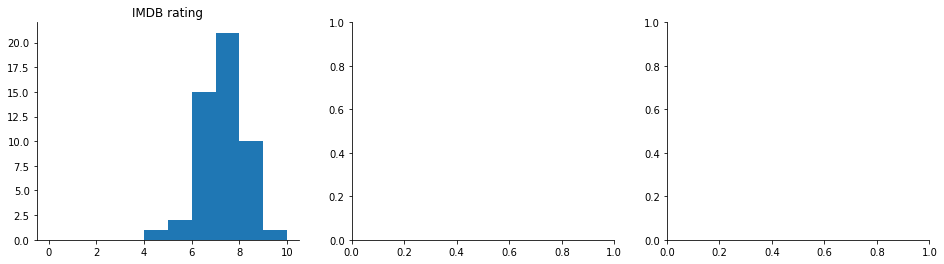

In [105]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

#meta critic

#meta critic v imdb 

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()
